In [16]:
import grid2op
from grid2op.Agent import DoNothingAgent

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# See what options we have to test with
grid2op.list_available_remote_env()

['l2rpn_2019',
 'l2rpn_case14_sandbox',
 'l2rpn_icaps_2021_large',
 'l2rpn_icaps_2021_small',
 'l2rpn_neurips_2020_track1_large',
 'l2rpn_neurips_2020_track1_small',
 'l2rpn_neurips_2020_track2_large',
 'l2rpn_neurips_2020_track2_small',
 'l2rpn_wcci_2020',
 'rte_case14_realistic',
 'rte_case14_redisp',
 'wcci_test']

In [27]:
def collect_obs(env_name, n_steps):
    env = grid2op.make(env_name)
    agent = DoNothingAgent(env.action_space)
    obs = env.reset()
    reward = env.reward_range[0]
    done = False
    all_obs = []

    for i in range(n_steps):
        all_obs.append(obs)
        action = agent.act(obs, reward, done)
        obs, reward, done, _ = env.step(action)
        if done:
            break
    all_obs.append(obs)
    print(f"Collected {len(all_obs)} observations.")
    return all_obs

In [28]:
def plot_2d_np_array(arr, y_label="Units", x_label="Steps", title=None, legend=False):
    x_axis = np.arange(arr.shape[0])
    for dim in range(arr.shape[1]):
        plt.plot(x_axis, arr[:,dim], label=str(dim+1))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if title is not None:
        plt.title(title)
    if legend:
        plt.legend()
    plt.show()

In [39]:
# This will be the grid2op environment we track
ENV_TO_TRACK = 'l2rpn_2019'
# This is the number of steps we will track the environment for
N_STEPS = 200
all_obs = collect_obs('l2rpn_2019', 200)
# Get the stats (gens, loads, etc. See https://grid2op.readthedocs.io/en/latest/observation.html for more details)

# Generations (the documentation is very unclear as to the difference between p, q, and v gens/loads)
gen_p = np.array([ob.gen_p for ob in all_obs]) # Active production
gen_q = np.array([ob.gen_q for ob in all_obs]) # Reactive production
gen_v = np.array([ob.gen_v for ob in all_obs]) # Voltage Magnitude

# Loads 
load_p = np.array([ob.load_p for ob in all_obs]) # Active power load
load_q = np.array([ob.load_q for ob in all_obs]) # Reactive power load
load_v = np.array([ob.load_v for ob in all_obs]) # Voltage load

# Line Capacity
rho = np.array([ob.rho for ob in all_obs])

Collected 201 observations.


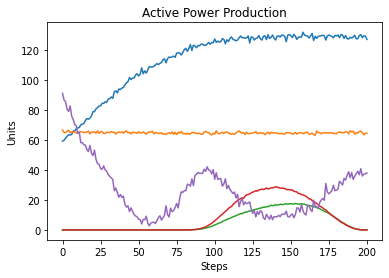

In [40]:
# Plot gen_p (active power production)
plot_2d_np_array(gen_p, title="Active Power Production")

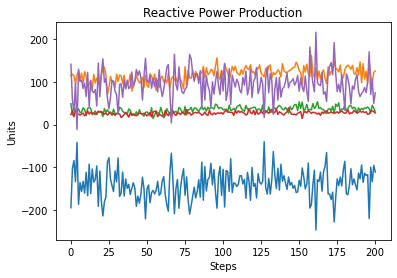

In [41]:
# Plot gen_q (reactive power production)
plot_2d_np_array(gen_q, title="Reactive Power Production")

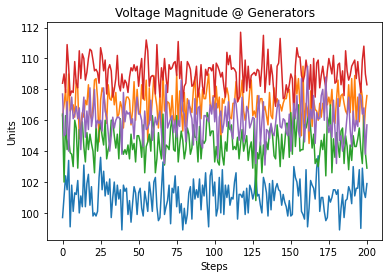

In [42]:
# Plot gen_v 
plot_2d_np_array(gen_v, title="Voltage Magnitude @ Generators")

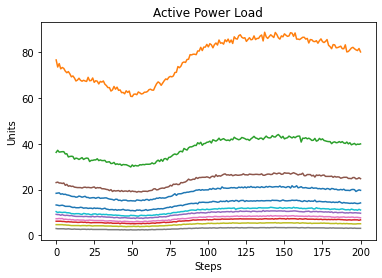

In [43]:
# Plot load_p
plot_2d_np_array(load_p, title="Active Power Load")

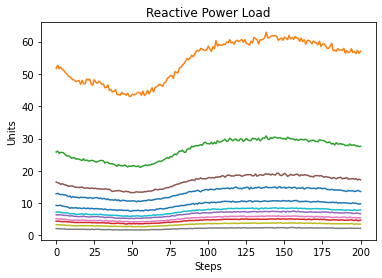

In [44]:
# Plot load_q
plot_2d_np_array(load_q, title="Reactive Power Load")

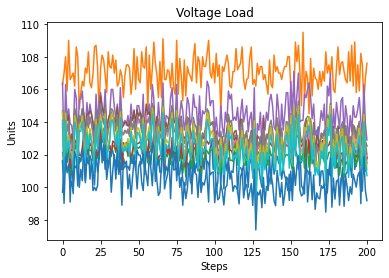

In [45]:
# Plot load_v
plot_2d_np_array(load_v, title="Voltage Load")

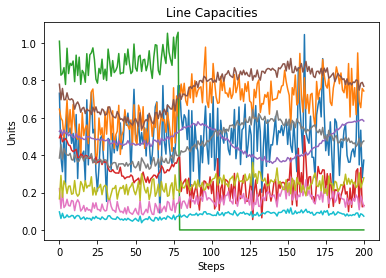

In [48]:
# Line capacity
plot_2d_np_array(rho[:,::2], title="Line Capacities")

In [51]:
obs.gen_p = np.array([64, 103, 1, 1, 11])